In [21]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
#Load housing dataset
path = "../data/BostonHousing.csv"
df = pd.read_csv(path)

In [ ]:
#Check to see if the data is successfully loaded
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [ ]:
#Check what is in the data
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
#Display basic statistics
print(df.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [14]:
#Check missing data
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

# Visualization

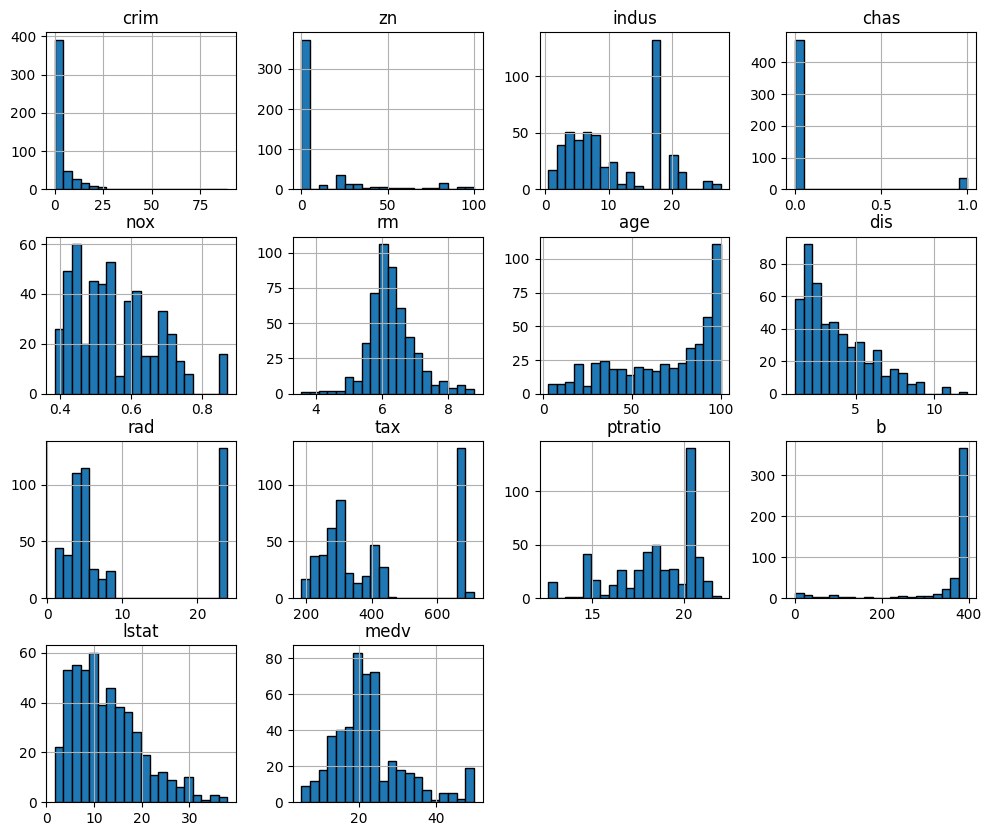

In [24]:
# Histogram
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.show()

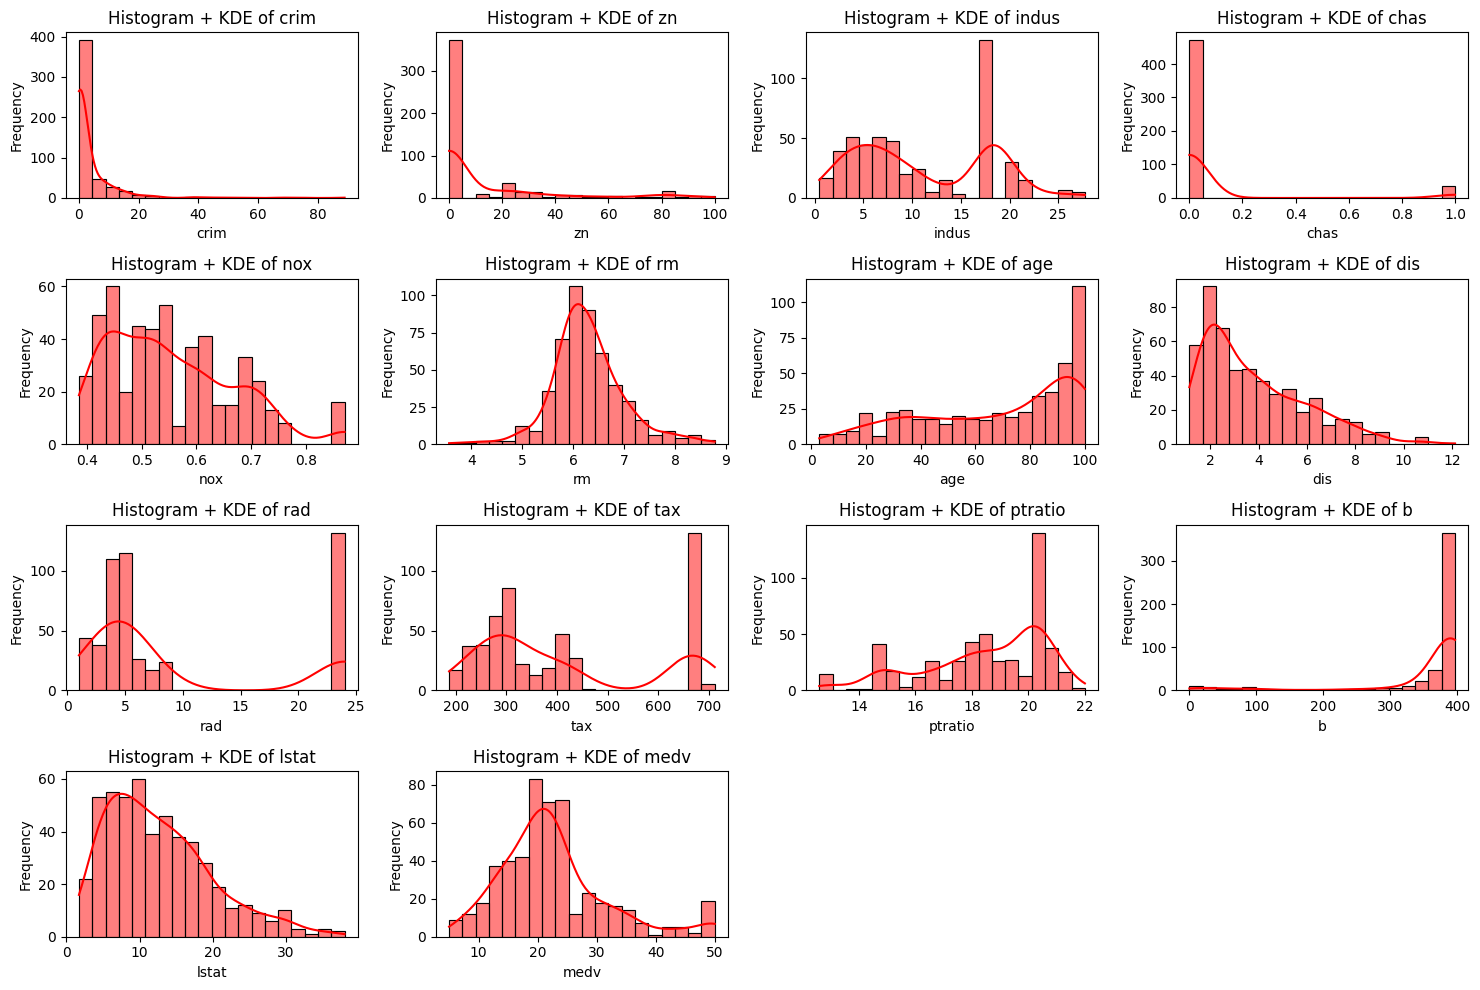

In [52]:
#Histogram with kde
variables = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))  # Set overall figure size

for i, column in enumerate(variables, 1):
    plt.subplot(4, 4, i)  # 4x4 grid
    sns.histplot(df[column], bins=20, kde=True, edgecolor='black', color='red')
    plt.title(f'Histogram + KDE of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

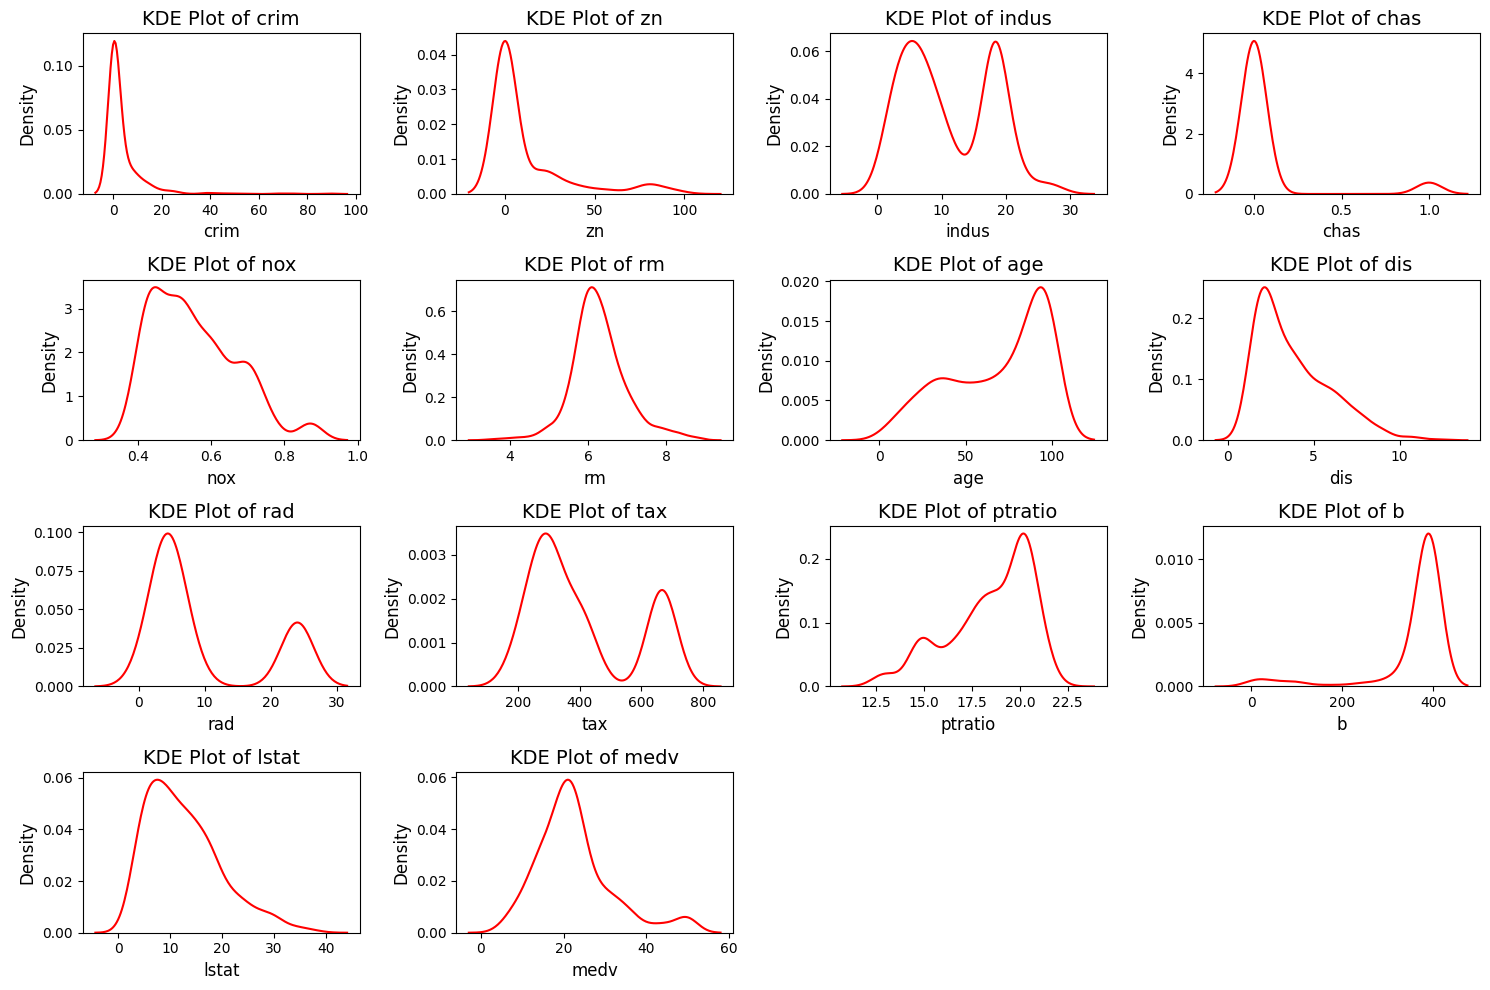

In [50]:
# Plot KDE plotss
# Get all numeric columns
variables = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))  # Set overall figure size

# Loop with index for subplot positioning
for i, column in enumerate(variables, 1):
    plt.subplot(4, 4, i)  # 4x4 grid; adjust if you have more/less features
    sns.kdeplot(df[column], color='red')
    plt.title(f'KDE Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()


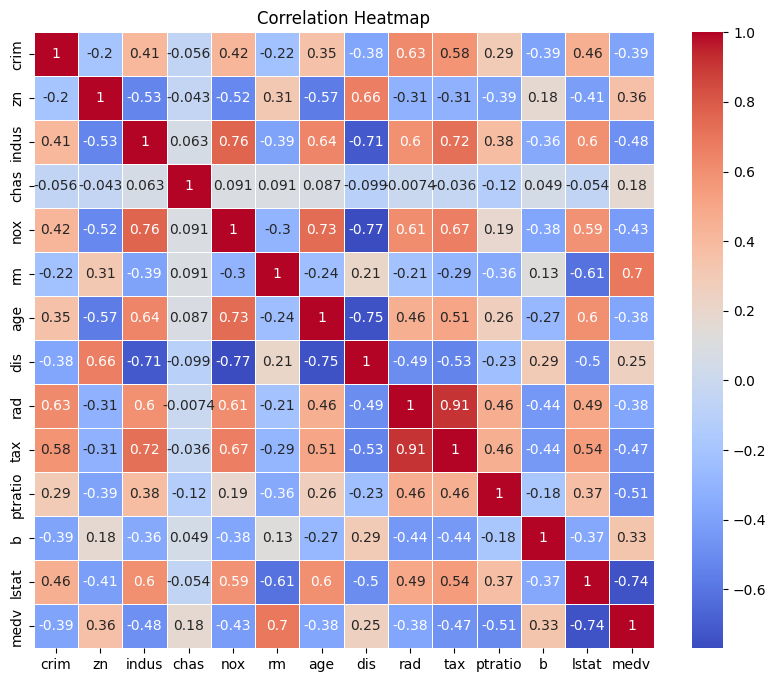

In [30]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

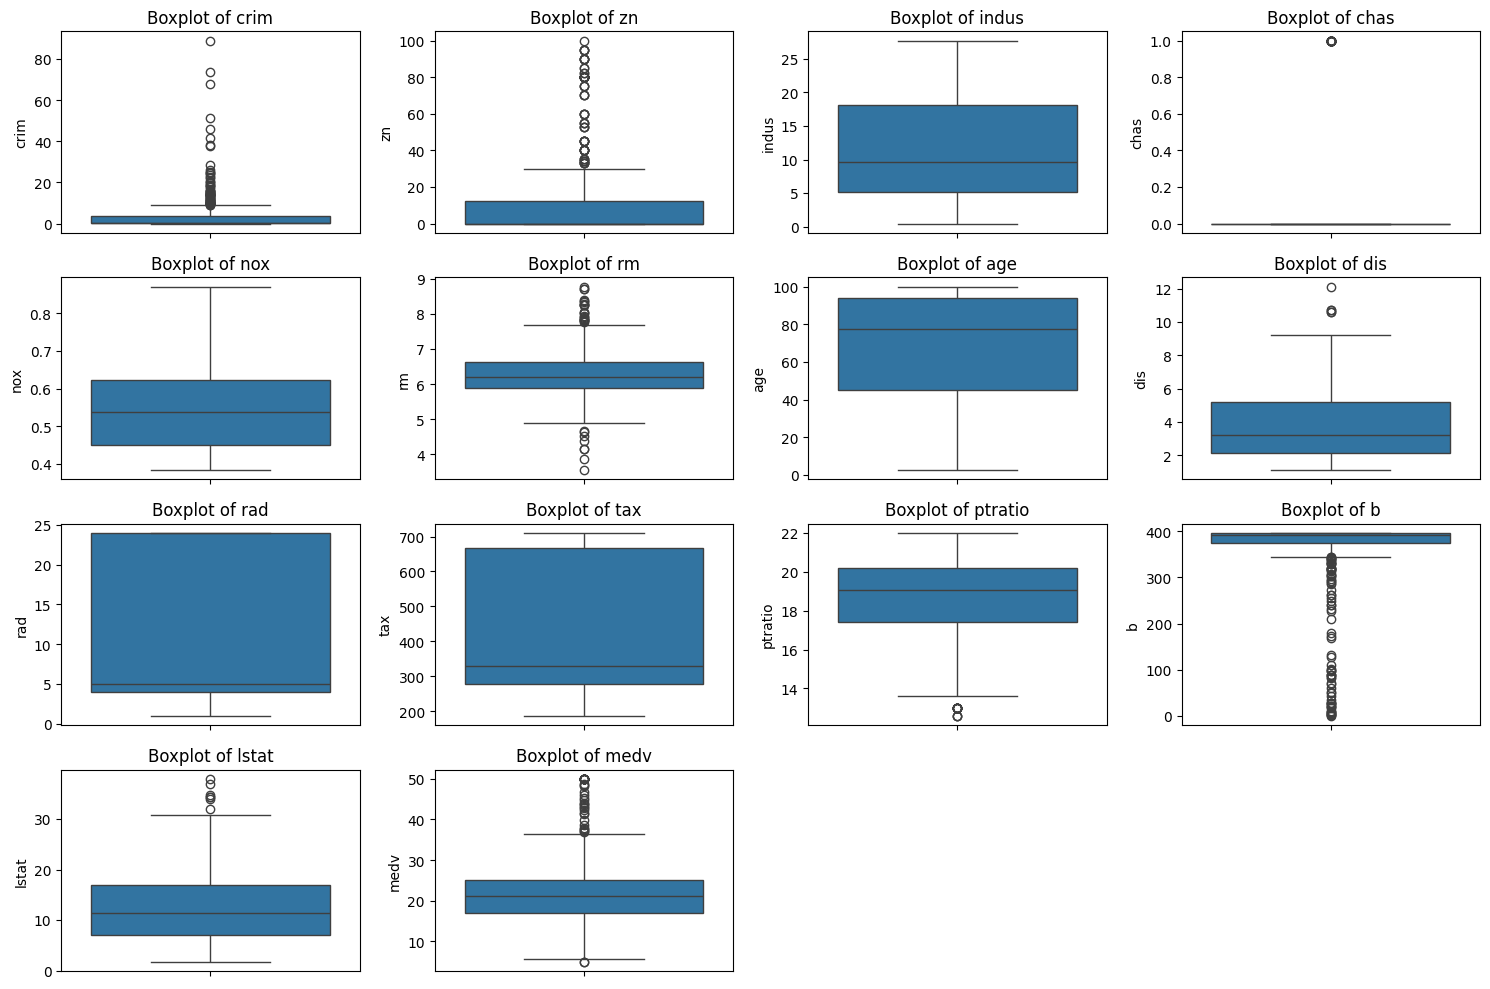

In [43]:
#Box Plots
plt.figure(figsize=(15, 10))  # Set figure size for all subplots

# Loop through all numeric columns
for i, column in enumerate(df.columns, 1): 
    #enumerate(..., 1): Gives you both the index i and 
    #the column name column. Starting from 1 instead of 0 
    # because Matplotlib’s subplot() indexing starts at 1.
    plt.subplot(4, 4, i)  # Adjust grid based on number of features: use higher number to avoid deletion
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

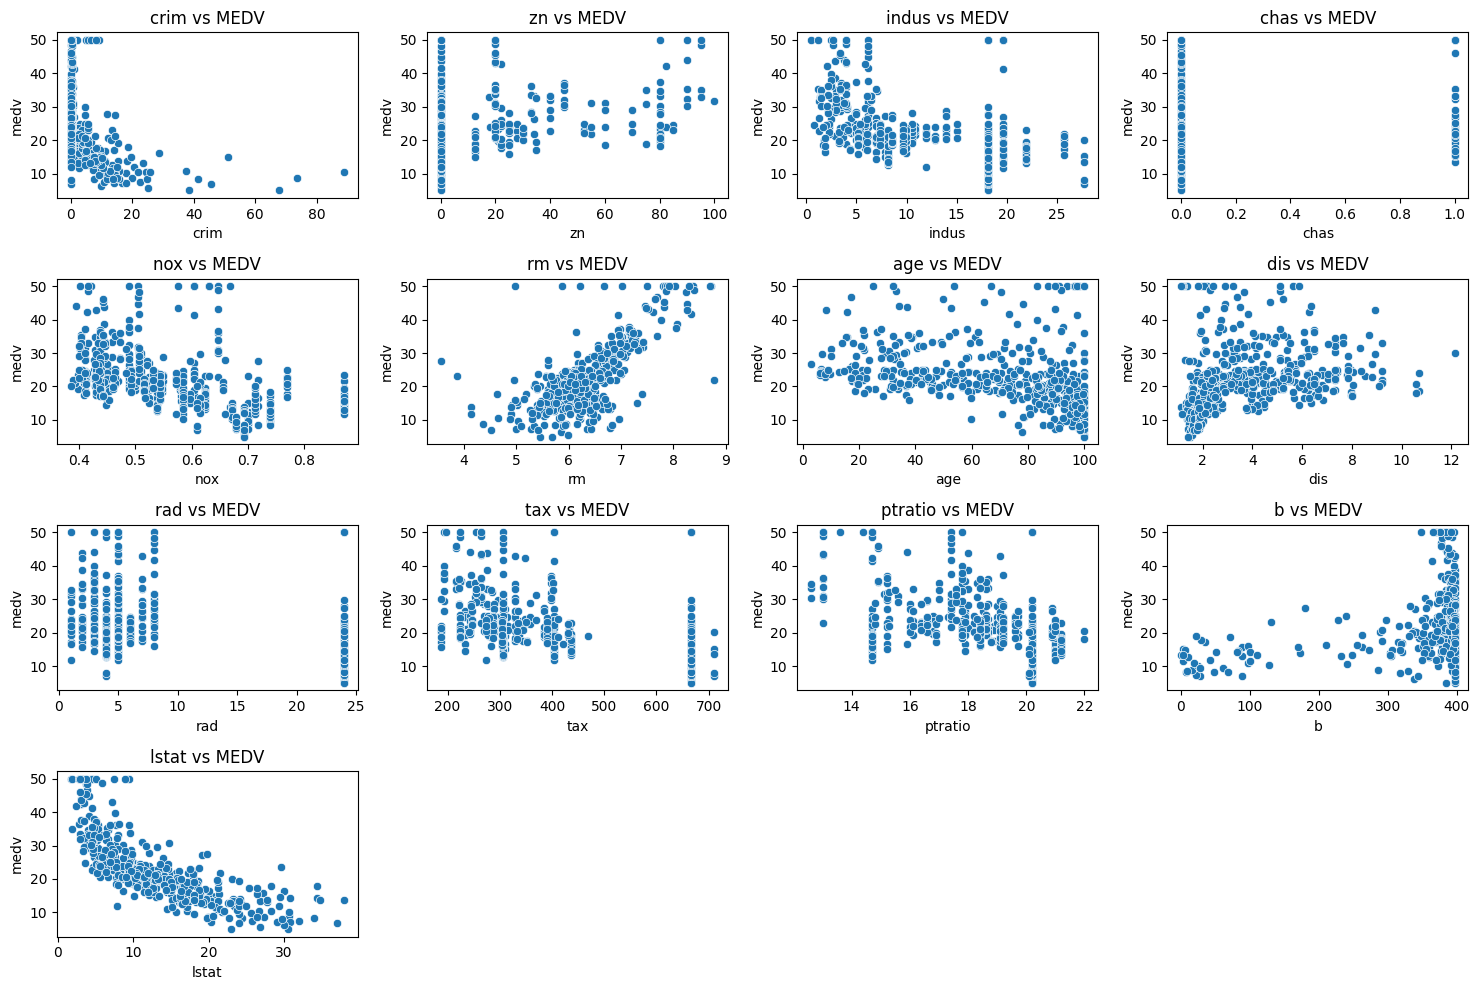

In [ ]:
#Scatter Plots for Multiple Features vs. Target (MEDV)
plt.figure(figsize=(15, 10))  # Set figure size

for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'MEDV' from x-axis --- last column is the target
    plt.subplot(4, 4, i)  # Adjust grid (e.g., 4x4 for 13-15 features)
    sns.scatterplot(x=df[column], y=df['medv'])
    plt.title(f"{column} vs MEDV")

plt.tight_layout()
plt.show()